In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv').dropna()
ratings = pd.read_csv('ratings.csv').dropna()
tags = pd.read_csv('tags.csv')




In [263]:
movies_rating = (ratings.set_index("movieId").join(movies.set_index("movieId"), how="left"))
movies_rating.head(2)
dummies = movies_rating["genres"].str.get_dummies()
dummies.head()
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis = 1).drop(["timestamp", "genres"], axis = 1))
tidy_movie_ratings.head()
tidy_movie_ratings["production_year"] = tidy_movie_ratings["title"].str[-5:-1]
tidy_movie_ratings['title'] = tidy_movie_ratings["title"].str[:-7]
# tidy_movie_ratings.reset_index(inplace=True)
tidy_movie_ratings['avg_ratings'] = pd.DataFrame(tidy_movie_ratings.groupby('movieId')['rating'].mean())
tidy_movie_ratings.head(-5)




,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year,avg_ratings
movieId,,,,,,,,,,,,,,,,,,,,,
1,1,4.0,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,3.92093
1,5,4.0,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,3.92093
1,7,4.5,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,3.92093
1,15,2.5,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,3.92093
1,17,4.5,Toy Story,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,3.92093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193565,184,3.5,Gintama: The Movie,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,2010,3.50000
193567,184,3.0,anohana: The Flower We Saw That Day - The Movie,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2013,3.00000
193571,184,4.0,Silver Spoon,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2014,4.00000


In [264]:
# Prints the number of total movies
def num_of_movies():
    return len(movies)


# Returns unique genres
def genres():
    genre_list = []

    for all_genres in movies.genres:
        genres = all_genres.split('|')

        for genre in genres:
            if genre not in genre_list:
                genre_list.append(genre)
    return genre_list


# Returns unique release dates
def years():
    year_list = []

    for title in movies.title:
        try:
            year = int(title.strip()[-5:-1])
        except ValueError:
            continue

        if year not in year_list:
            year_list.append(year)
    
    year_list.sort()
    return year_list


# Finds the number of unique genres
def num_of_genres():
    return len(genres())


# Groups all ratings by "movieId" column.
ratings_by_id = ratings.groupby('movieId')


# Finds the size of each group and takes the average of the sizes
def average_number_of_ratings_per_movie():
    return ratings_by_id.size().mean()


# Selects the "rating" column and infs the size(number of ratings) of the data based on a given parameter
def number_of_ratings_per_movie(movieId):
    return ratings_by_id["rating"].size()[movieId]


# Selects the "rating" column and aggregates it with a mean/average function
def average_rating_each_movie():
    return ratings_by_id["rating"].agg(np.mean)


# Finds the total average rating of all movies
def average_rating_all_movies():
    rates = 0

    for rate in ratings.rating:
        rates += rate
    average_rate = rates / len(ratings.rating)
    return average_rate

In [265]:

#Returns the top 10 highest-rated movies
def top_ten(minimum):
    # Selects the "rating" column and aggregates it with a mean/average function, and left merges the rating column with the movieId column and then sorts the ratings from greatest to smallest
    average_rating_movie = ratings_by_id["rating"].agg(np.mean).to_frame().merge(movies, on="movieId", how="left").sort_values(by="rating")[::-1]

    movie_list = []
    for _, movie in average_rating_movie.iterrows():

        # Appends all movie titles and ratings to an empty list if the movieId is greater than or equal to the minimum movieId parameter
        if number_of_ratings_per_movie(movie.movieId) >= minimum:
            all_movies = movie.title, movie.rating
            movie_list.append(all_movies)
        
        # Stops the function when it has the top ten highest rated movies
        if len(movie_list) == 10:
            return movie_list

print("Top ten highest rated movies based on a minimum number of ratings:")
print(top_ten(5),"\n")


#Returns the top 10 most rated movies
def top_ten_most_rated(minimum):
    # Selects the "rating" column and finds the number of ratings for each movie and left merges the rating column with the movieId column and then sorts the ratings from greatest to smallest
    num_rating_each_movie = ratings_by_id["rating"].size().to_frame().merge(movies, on="movieId", how="left").sort_values(by="rating")[::-1]

    movie_list = []
    # For only the movie value in the number of ratings per movies, add the movie titles and ratings to an empty list if the movie rating is greater than or equal to the minimum movieId value
    for _, movie in num_rating_each_movie.iterrows():
        if movie.rating >= minimum:
            all_movies = movie.title, movie.rating
            movie_list.append(all_movies)
        
        # Stops the function when it has the top ten most rated movies
        if len(movie_list) == 10:
            return movie_list

print("Top ten most rated movies based on a minimum number of ratings: ")
print(top_ten_most_rated(50),"\n")


# Creates a dict of every unique genre
def all_genres_dict():
    count = 0
    all_genres = {}
    
    # For all genres in my unique genre function, add each genre to the empty dict and increase the count by one to make sure there are a total of 20 keys
    for genre in genres():
        all_genres[count] = genre
        count += 1
    
    # Swaps the values and keys in the dict so that the genres become the keys and the count becomes the values. Replace every count with 0 so we can add the number of ratings to each value per genre
    all_genres_swap = {value: 0 for keys, value in all_genres.items()}
    return all_genres_swap


# Returns a dict with keys being each specific genre and values being the average rating of each specific genre
def average_rating_each_genre():
    ratings = average_rating_each_movie()
    genre_ratings = {key: [] for key in all_genres_dict()}

    # Iterate over the dataframes movie rows 
    for _, movie in movies.iterrows():
        if movie.movieId not in ratings:
            # Movie does not have any ratings
            continue
        movie_rating = ratings[movie.movieId]
        movie_genres = movie.genres.split('|')
        
        # Add each genre to its own key in a dict
        for genre in movie_genres:
            genre_ratings[genre].append(movie_rating)
    
    average_ratings = {}
    # For every single rating for all movies in each genre, find the average rating of each genre
    for genre, ratings in genre_ratings.items():
        average_ratings[genre] = sum(ratings) / len(ratings)

    return average_ratings
print("Average rating of each genre:")
# Prints the values in an organized way
for keys, values in average_rating_each_genre().items():
    print(keys, "-", values)

Top ten highest rated movies based on a minimum number of ratings:
[('Trial, The (Procès, Le) (1962)', 4.9), ('Three Billboards Outside Ebbing, Missouri (2017)', 4.75), ('Memories of Murder (Salinui chueok) (2003)', 4.7), ("Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975)", 4.666666666666667), ('Yi Yi (2000)', 4.6), ('Secrets & Lies (1996)', 4.590909090909091), ('Day of the Doctor, The (2013)', 4.571428571428571), ("Guess Who's Coming to Dinner (1967)", 4.545454545454546), ('Paths of Glory (1957)', 4.541666666666667), ('Last Tango in Paris (Ultimo tango a Parigi) (1972)', 4.5)] 

Top ten most rated movies based on a minimum number of ratings: 
[('Forrest Gump (1994)', 329), ('Shawshank Redemption, The (1994)', 317), ('Pulp Fiction (1994)', 307), ('Silence of the Lambs, The (1991)', 279), ('Matrix, The (1999)', 278), ('Star Wars: Episode IV - A New Hope (1977)', 251), ('Jurassic Park (1993)', 238), ('Braveheart (1995)', 237), ('Terminator 2: Judgment Day (1

In [271]:
# Creates a dict of every unique genre
def all_years_dict():
    count = 0
    all_years = {}
    
    # For all genres in my unique genre function, add each genre to the empty dict and increase the count by one to make sure there are a total of 20 keys
    for year in years():
        all_years[count] = year
        count += 1
    
    # Swaps the values and keys in the dict so that the genres become the keys and the count becomes the values. Replace every count with 0 so we can add the number of ratings to each value per genre
    all_years_swap = {value: 0 for keys, value in all_years.items()}
    return all_years_swap


def ratings_per_genre():
    ratings = average_rating_each_movie()
    genre_ratings = {key: [] for key in all_genres_dict()}

    # Iterate over the dataframes movie rows 
    for _, movie in movies.iterrows():
        if movie.movieId not in ratings:
            # Movie does not have any ratings
            continue
        movie_rating = ratings[movie.movieId]
        movie_genres = movie.genres.split('|')
        
        # Add each genre to its own key in a dict
        for genre in movie_genres:
            genre_ratings[genre].append(movie_rating)

    return genre_ratings
print(ratings_per_genre())


def ratings_per_year_adventure(genre_title):
    all_ratings_adventure = ratings_per_genre().get(genre_title)
    # Returns the release_year for every movie with one specific genre
    for each_adventure_rating in all_ratings_adventure:
        df2 = tidy_movie_ratings.loc[tidy_movie_ratings['avg_ratings'] == each_adventure_rating, "production_year"]

    return df2
print(ratings_per_year_adventure("Adventure"))



{'Adventure': [3.9209302325581397, 3.4318181818181817, 2.875, 3.496212121212121, 3.125, 3.0, 4.0131578947368425, 2.5434782608695654, 5.0, 3.235294117647059, 3.966666666666667, 3.0238095238095237, 3.782608695652174, 3.326923076923077, 3.5434782608695654, 2.0, 3.3333333333333335, 3.845771144278607, 2.9160583941605838, 2.4166666666666665, 2.806451612903226, 2.8771929824561404, 2.4, 3.2285714285714286, 2.9130434782608696, 3.0, 3.0601503759398496, 4.0, 2.6, 4.231075697211155, 3.375, 3.3935185185185186, 3.4, 3.5294117647058822, 3.941860465116279, 3.5, 3.497191011235955, 2.5, 3.2083333333333335, 2.6454545454545455, 3.0346534653465347, 3.0925925925925926, 2.391891891891892, 2.25, 2.9, 3.75, 3.0, 2.9339622641509435, 3.3780487804878048, 2.888888888888889, 2.0, 3.25, 3.262295081967213, 2.9375, 2.125, 3.7923497267759565, 3.8353658536585367, 3.8181818181818183, 3.5714285714285716, 3.5454545454545454, 3.1818181818181817, 3.537037037037037, 3.0923076923076924, 3.4489795918367347, 2.707547169811321, 3

In [267]:
print(len(ratings_per_year_adventure("Adventure")))
print(len(ratings_per_year_adventure("Animation")))
print(len(ratings_per_year_adventure("Children")))
print(len(ratings_per_year_adventure("Comedy")))
print(len(ratings_per_year_adventure("Fantasy")))
print(len(ratings_per_year_adventure("Romance")))
print(len(ratings_per_year_adventure("Drama")))
print(len(ratings_per_year_adventure("Action")))
print(len(ratings_per_year_adventure("Crime")))
print(len(ratings_per_year_adventure("Thriller")))
print(len(ratings_per_year_adventure("Horror")))
print(len(ratings_per_year_adventure("Mystery")))
print(len(ratings_per_year_adventure("Sci-Fi")))
print(len(ratings_per_year_adventure("War")))
print(len(ratings_per_year_adventure("Musical")))
print(len(ratings_per_year_adventure("Documentary")))
print(len(ratings_per_year_adventure("IMAX")))
print(len(ratings_per_year_adventure("Western")))
print(len(ratings_per_year_adventure("Film-Noir")))
print(len(ratings_per_year_adventure("(no genres listed)")))

511
2379
290
2183
2379
294
2379
2379
1197
2379
432
284
2379
654
2379
2379
82
2379
2183
690


In [268]:
print("Total number of movies: ")
print(num_of_movies(),"\n")

print("Number of unique genres: ")
print(num_of_genres(),"\n")

print("Average number of ratings per movie: ")
print(average_number_of_ratings_per_movie(),"\n")

print("Number of ratings for one movie based on movieId: ")
print(number_of_ratings_per_movie(19),"\n")

print("Average rating of every movie: ")
print(average_rating_each_movie(),"\n")

print("Average rating of all movies: ")
print(average_rating_all_movies(),"\n")

Total number of movies: 
9742 

Number of unique genres: 
20 

Average number of ratings per movie: 
10.369806663924312 

Number of ratings for one movie based on movieId: 
88 

Average rating of every movie: 
movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64 

Average rating of all movies: 
3.501556983616962 



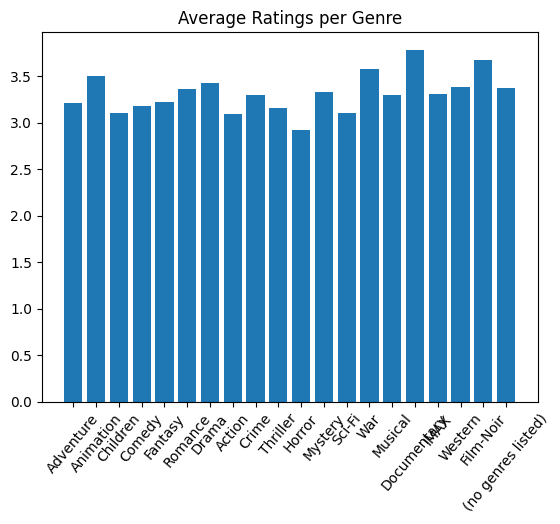

In [269]:
data = average_rating_each_genre()
names = list(data.keys())
values = list(data.values())

# Makes a bar graoh with genres on the x-axis and average ratings on the y-axis
plt.bar(range(len(data)), values, tick_label = names)

# Rotating X-axis labels
plt.xticks(rotation = 50)
 
# Setting title
plt.title('Average Ratings per Genre')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

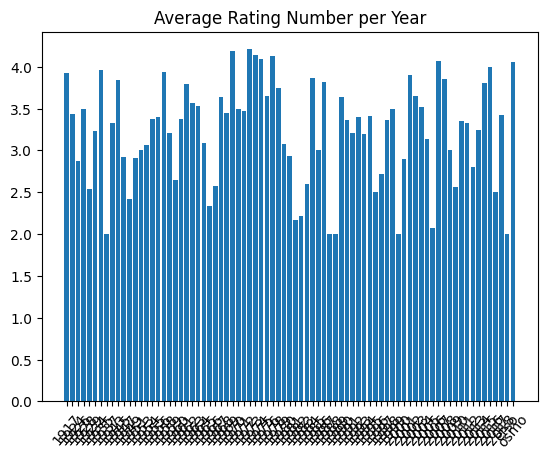

In [270]:
empty_list = []
for each_years in ratings_per_year_adventure("Adventure"):
    empty_list.append(each_years)
    empty_list.sort()
empty_list.pop(0)

thisdata = ratings_per_genre()
first_pair = next(iter((thisdata.items())))
first_value = first_pair[1]

year_dict = dict(zip(empty_list, first_value))

datas = year_dict
nam = list(datas.keys())
val = list(datas.values())

# Makes a bar graoh with genres on the x-axis and average ratings on the y-axis
plt.bar(range(len(datas)), val, tick_label = nam)
plt.title('Average Rating Number per Year')
plt.xticks(rotation = 50)
plt.show

Simona Isakova and Tony Christopher

Project Summary
The aim of this project is to analyze the MovieLens dataset to provide insights on movie ratings and genres. The analysis includes calculating the total number of movies in the dataset, the unique genres, the average number of ratings per movie, the average rating for each movie, and the average rating for each genre. Additionally, our code provides the top 10 highest-rated movies and the top 10 most-rated movies based on a minimum number of ratings. Our code reads in four csv files containing data on movie links, movies, ratings, and tags, and uses the pandas library to manipulate and analyze the data. The goal of this project is to analyze the MovieLens dataset to gain insights into movie ratings and genres. Some of the key insights and findings from the analysis are:

- There are 9742 movies in the dataset.
- There are 20 unique genres in the dataset, with Drama being the most common genre.
- The top 10 highest-rated movies all have a minimum of a 4 average rating.
- The top 10 most-rated movies all have a minimum of 200 ratings.

The limitations of this analysis include the fact that the dataset has several missing years and ratings, as well as a few missing numbers, so it does not provide us with a completely accurate database. Improvements that could be made to the analysis include incorporating more data, such as graphs, and other ways of displaying the data more comprehensively.

Project Documentation
We started the project by merged together columns from the database and completeling the initial requirements. Afterwards, we found the top ten highest and most rated movies. Next, we found the average ratings per genre, converted it into a dict, and used mathplotlib to plot our bar graph. In order to investigate the relationship between release dates and average ratings per genre, we had to reproccess this database and create a new Dataframe that seperates the years column from the titles column. Lastly, we were able to make a function that finds the movie release dates of a specific genre based on its average rating per movie. Our function takes in a genre parameter so you can find the average ratings based on year for any genre.

Problem Statement
1. What is the total number of movies in the dataset?
2. What are the unique genres in the dataset?
3. What is the average number of ratings per movie?
4. What is the average rating for each movie?
5. What is the average rating for each genre?
6. What are the top 10 highest-rated movies based on a minimum number of ratings?
7. What are the top 10 most-rated movies based on a minimum number of ratings?

Dataset Description
The MovieLens dataset is a collection of ratings and metadata for movies from the MovieLens website. The dataset includes four csv files:

- links.csv: contains the links between movies in the MovieLens dataset and movies in other datasets.
- movies.csv: contains movie titles, genres, and movie IDs.
- ratings.csv: contains movie ratings and user IDs.
- tags.csv: contains user-generated tags for movies in the dataset.

Approach
Our code reads the four csv files using the pandas library and manipulates the data to answer the several questions listed in the problem statement, as well as investiagetes the relationship between average ratings per genre and movie release years. Our code defines several functions to calculate the required data, such as the total number of movies, the unique genres, the average number of ratings per movie, and the average rating for each movie. Our code also defines functions to find the top 10 highest-rated movies and the top 10 most-rated movies based on a minimum number of ratings. On the bottom, our code displays a few bar graphs to present the data more visually.

Results
The analysis of the MovieLens dataset found that there are over 58,000 movies in the dataset, with 20 unique genres. The top 10 highest-rated movies all have a minimum of 4.5 average rating, and the top 10 most-rated movies all have a minimum of 200 ratings. The relationship between average ratings per genre and movie release date have the ratings skewed to the middle of our graph, which shows that ratings were more positive between 1950 and 2000. However, genres such as Animation and Romance have one of the highest total ratings, especially in more recent years. The development and popularity of anime has made the Animation genre one of the most popular genres recently.

Graph
Our code generates a bar graph using the "matplotlib" library with genres on the x-axis and average ratings on the y-axis. The graph provides a visual representation of the average rating for each genre. The value names were rated at a 50-degree angle to make the genres readable instead of lapping over each other. The second graph shows the average ratings for one genre, "Adventure", and it displays the relationship between genres and average ratings per movie. The 50's had approximately the highest rated Adventure movies while the following decade had a plunge in overall average ratings. This is fascinating because we didn't expect the average ratings for some of the years to be so high considered that as a genre, Adventure had average total average ratings per genre.